In [106]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [64]:
# Import data
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
print(f"Test dataset shape {df_test.shape}\nTrain dataset shape: {df_train.shape}")

Test dataset shape (418, 11)
Train dataset shape: (891, 12)


### Explore data - EDA and preprocessing

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Data description
"""
survival - Survival - 0 = No, 1 = Yes
pclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
sex - Sex	
Age - Age in years	
sibsp - # of siblings / spouses aboard the Titanic	
parch - # of parents / children aboard the Titanic	
ticket - Ticket number	
fare - Passenger fare	
cabin - Cabin number	
embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nsurvival - Survival - 0 = No, 1 = Yes\npclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd\nsex - Sex\t\nAge - Age in years\t\nsibsp - # of siblings / spouses aboard the Titanic\t\nparch - # of parents / children aboard the Titanic\t\nticket - Ticket number\t\nfare - Passenger fare\t\ncabin - Cabin number\t\nembarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton\n'

In [67]:
for col in list(df_train.columns):
    print(f"Unique values in {col}: {len(list(df_train[col].dropna().unique()))}\n{sorted(list(df_train[col].dropna().unique()))}\n")

Unique values in PassengerId: 891
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215

In [68]:
# How many women and men survived in percentage ?
women = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]
men = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]
women_survived = len(women) / len(df_train[df_train['Sex'] == 'female'])
men_survived = len(men) / len(df_train[df_train['Sex'] == 'male'])
print(f"Women survived: {women_survived*100}%\nMen survived: {men_survived*100}%")

Women survived: 74.20382165605095%
Men survived: 18.890814558058924%


In [69]:
df_train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
# Print column names for training dataset
print("Columns in df_train:")
print(df_train.columns)

# Print column names for test dataset
print("\nColumns in df_test:")
print(df_test.columns)

Columns in df_train:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns in df_test:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


###### Missing values

In [71]:
# Identify columns with missing values in training set
cols_with_missing_train = df_train.columns[df_train.isnull().any()]

# Identify columns with missing values in test set
cols_with_missing_test = df_test.columns[df_test.isnull().any()]

# Impute missing values for numeric features in training set
# find 5 nearest neighbors and use them for imputation (their values will be averaged)
imputer_numeric_train = KNNImputer(n_neighbors=5)
df_train[['Age']] = imputer_numeric_train.fit_transform(df_train[['Age']])

# Impute missing values for numeric features in test set
imputer_numeric_test = KNNImputer(n_neighbors=5)
df_test[['Age']] = imputer_numeric_test.fit_transform(df_test[['Age']])

# Impute missing values for categorical features in training set
# find the most frequent value and use it for imputation
for feature in ['Cabin', 'Embarked']:
    df_train[feature].fillna(df_train[feature].mode()[0], inplace=True)

# Impute missing values for categorical features in test set
for feature in ['Cabin', 'Embarked']:
    df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)

# Display the imputed datasets
print("Imputed Training Dataset:")
print(df_train)
print("\nImputed Test Dataset:")
print(df_test)

Imputed Training Dataset:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ... 

In [72]:
df_train.isna().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [73]:
df_train.shape

(891, 12)

Text(0.5, 1.0, 'Distribution of Parch')

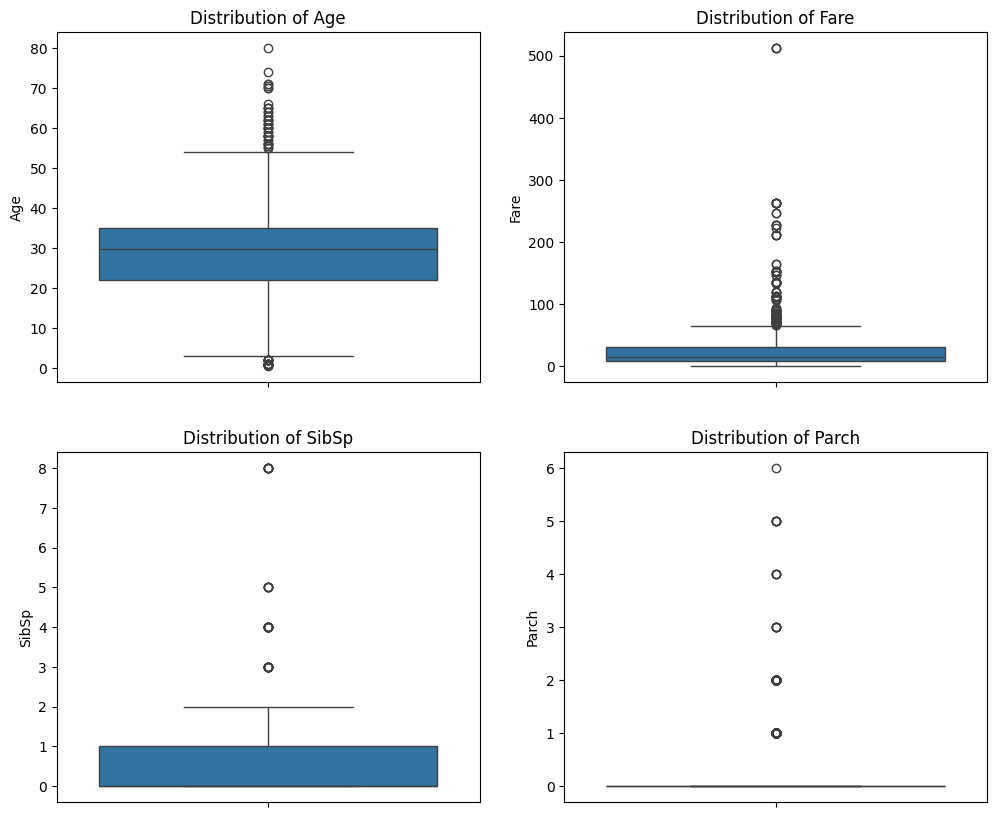

In [74]:
# Plot the outlaiers of training dataset
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Plot  'Age' in the training dataset
sns.boxplot(df_train['Age'], ax=axes[0,0])
axes[0,0].set_title('Distribution of Age')

# Plot 'Fare' in the training dataset
sns.boxplot(df_train['Fare'], ax=axes[0,1])
axes[0,1].set_title('Distribution of Fare')

# Plot 'SibSp' in the training dataset
sns.boxplot(df_train['SibSp'], ax=axes[1,0])
axes[1,0].set_title('Distribution of SibSp')

# Plot 'Parch' in the training dataset
sns.boxplot(df_train['Parch'], ax=axes[1,1])
axes[1,1].set_title('Distribution of Parch')

Text(0.5, 1.0, 'Distribution of Parch')

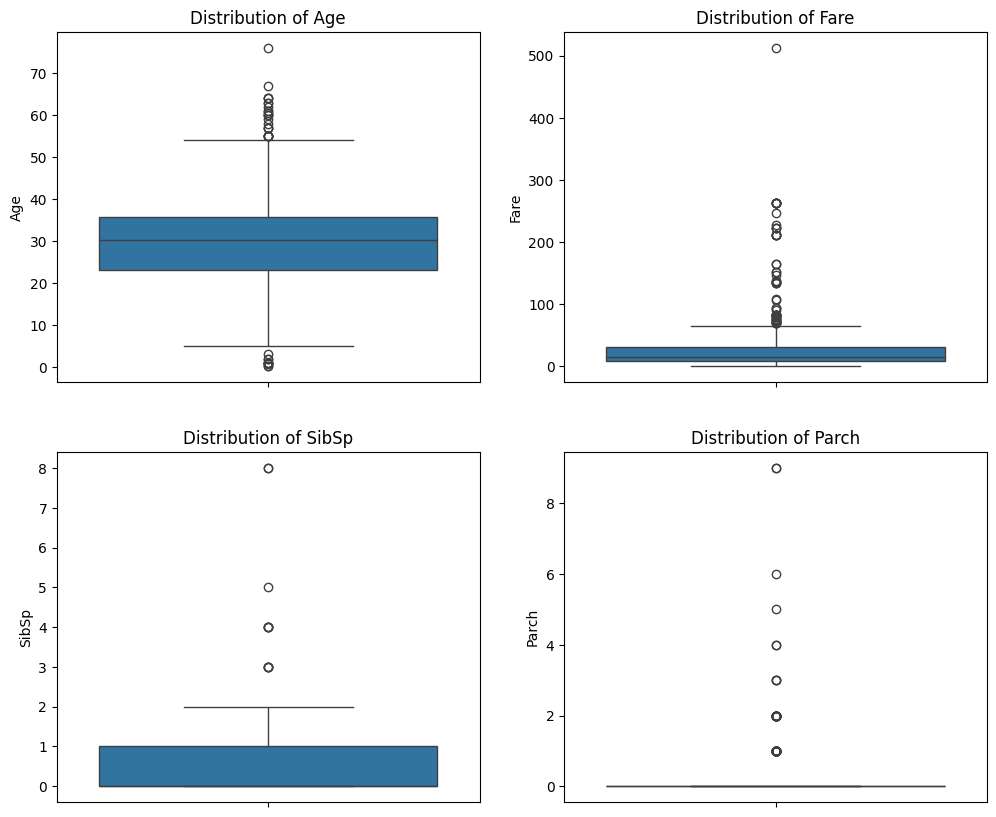

In [75]:
# Plot the outlaiers of test dataset
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Plot  'Age' in the test dataset
sns.boxplot(df_test['Age'], ax=axes[0,0])
axes[0,0].set_title('Distribution of Age')

# Plot 'Fare' in the test dataset
sns.boxplot(df_test['Fare'], ax=axes[0,1])
axes[0,1].set_title('Distribution of Fare')

# Plot 'SibSp' in the test dataset
sns.boxplot(df_test['SibSp'], ax=axes[1,0])
axes[1,0].set_title('Distribution of SibSp')

# Plot 'Parch' in the test dataset
sns.boxplot(df_test['Parch'], ax=axes[1,1])
axes[1,1].set_title('Distribution of Parch')

In [77]:
# Map categorical features
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [78]:
# pre istotu záloha
df_train2 = df_train
df_test2 = df_test

In [79]:
# Data discretization
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df_train['Age'] = age_discretizer.fit_transform(df_train[['Age']])
df_test['Age'] = age_discretizer.fit_transform(df_test[['Age']])

c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [82]:
# Insert missinf 'Fare' to df_test ecause one of them is missing
df_test.loc[df_test['Fare'].isna(), 'Fare'] = df_train['Fare'].median()

In [84]:
df_test.isna().sum() 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [85]:
fare_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df_train['Fare'] = fare_discretizer.fit_transform(df_train[['Fare']])
df_test['Fare'] = fare_discretizer.fit_transform(df_test[['Fare']])

c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [89]:
# Split dataset into X and y
X = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_train['Survived']

In [90]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model selection

In [91]:
# I choose DecisionTreeClassifier, Logistic regression, BaggingClassifier and AdaBoostClassifier and compare them
# Decision Tree
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(X_train, y_train)
decision_tree_pred = decision_tree_clf.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Classifier Accuracy:", decision_tree_accuracy)

# Logistic Regression
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)
logistic_pred = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging Classifier Accuracy:", bagging_accuracy)

# Boosting Classifier (AdaBoost)
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train, y_train)
boosting_pred = boosting_clf.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print("Boosting Classifier (AdaBoost) Accuracy:", boosting_accuracy)


Decision Tree Classifier Accuracy: 0.8212290502793296
Logistic Regression Accuracy: 0.7877094972067039
Bagging Classifier Accuracy: 0.8268156424581006
Boosting Classifier (AdaBoost) Accuracy: 0.7821229050279329


c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Helena Ripelova

"""
models = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df
y_test = sub_df['Survived']

for model in models:
    model.fit(X, y)
    y_pred = model.predict(X_test)
    print(model, accuracy_score(y_test, y_pred), '\n', classification_report(y_test, y_pred))
"""

### Hyper-parameter tuning

In [92]:
# Define parameter grids for each classifier
decision_tree_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

logistic_reg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'newton-cholesky', 'sag'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [100, 200, 300],
    'fit_intercept': [True, False]

}

bagging_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'verbose': [0, 1]
}

boosting_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [94]:
# Instantiate GridSearchCV for each classifier
bagging_grid_search = GridSearchCV(BaggingClassifier(), bagging_param_grid, cv=5, scoring='accuracy')
boosting_grid_search = GridSearchCV(AdaBoostClassifier(), boosting_param_grid, cv=5, scoring='accuracy')
logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_reg_param_grid, cv=5, scoring='accuracy')
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV for each classifier
bagging_grid_search.fit(X_train, y_train)
boosting_grid_search.fit(X_train, y_train)
logistic_grid_search.fit(X_train, y_train)
decision_tree_grid_search.fit(X_train, y_train)

c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Compute score

In [103]:
"""
bagging_grid_search
boosting_grid_search 
logistic_grid_search 
decision_tree_grid_search 
"""

# Evaluate the best model on the test set
# Decision tree
best_model_tree = decision_tree_grid_search.best_estimator_
y_pred_tree = best_model_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Logistic regression
best_model_logistic = logistic_grid_search.best_estimator_
y_pred_logistic = best_model_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Bagging
best_model_bagging = bagging_grid_search.best_estimator_
y_pred_bagging = best_model_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Boosting
best_model_boosting = boosting_grid_search.best_estimator_
y_pred_boosting = best_model_boosting.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)


print("Test Accuracy with DecisionTreeClassifier:", accuracy_tree)
print("Test Accuracy with LogisticRegression:", accuracy_logistic)
print("Test Accuracy with BaggingClassifier:", accuracy_bagging)
print("Test Accuracy with AdaBoostClassifier:", accuracy_boosting)

Test Accuracy with DecisionTreeClassifier: 0.7206703910614525
Test Accuracy with LogisticRegression: 0.8044692737430168
Test Accuracy with BaggingClassifier: 0.8100558659217877
Test Accuracy with AdaBoostClassifier: 0.7932960893854749


In [105]:
print(f"Classification report for DecisionTreeClassifier:\n {classification_report(y_test, y_pred_tree)}")
print(f"\nClassification report for LogisticRegression:\n {classification_report(y_test, y_pred_logistic)}")
print(f"\nClassification report for BaggingClassifier:\n {classification_report(y_test, y_pred_bagging)}")
print(f"\nClassification report for AdaBoostClassifier:\n {classification_report(y_test, y_pred_boosting)}")

Classification report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       105
           1       0.79      0.45      0.57        74

    accuracy                           0.72       179
   macro avg       0.74      0.68      0.68       179
weighted avg       0.74      0.72      0.70       179


Classification report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Classification report for BaggingClassifier:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                        

##### AUC-ROC Curve

In [111]:
y_prob_tree = decision_tree_grid_search.predict_proba(X_test)[:, 1]
y_prob_logistic = logistic_grid_search.predict_proba(X_test)[:, 1]
y_prob_bagging = bagging_grid_search.predict_proba(X_test)[:, 1]
y_prob_boosting = boosting_grid_search.predict_proba(X_test)[:, 1]

In [112]:
# Compute ROC curve and ROC AUC score for the best model (Bagging)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bagging)
roc_auc = auc(fpr, tpr)

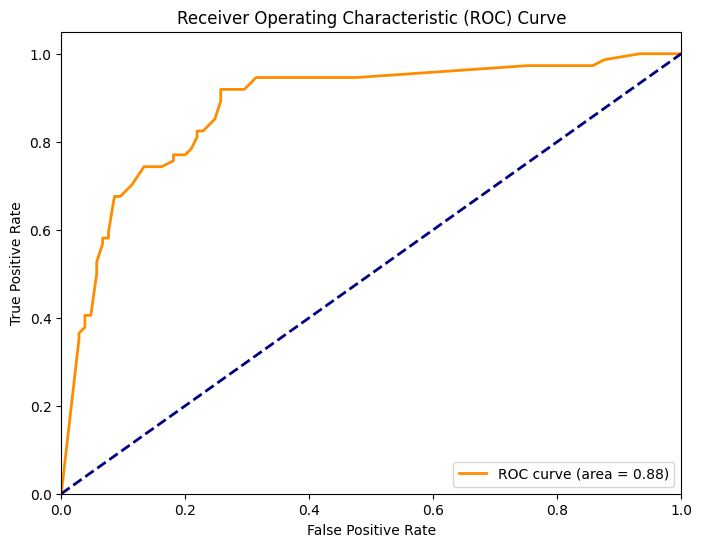

In [113]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### test.csv

In [114]:
# Make predictions on the test set
X_test_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


y_pred_test_tree = best_model_tree.predict(X_test_test).astype(int)

y_pred_test_logistic = best_model_logistic.predict(X_test_test).astype(int)

y_pred_test_bagging = best_model_bagging.predict(X_test_test).astype(int)

y_pred_test_boosting = best_model_boosting.predict(X_test_test).astype(int)


In [116]:
Id = df_test['PassengerId']
target = pd.Series(y_pred_test_bagging, name='Survived')

output = pd.concat({'PassengerId':Id, 'Survived':target}
                   ,axis='columns')

output.to_csv('submission.csv', index=False, header=True)

In [101]:
# Save predictions to a CSV file
df_test['Predicted_tree'] = y_pred_test_tree
df_test['Predicted_logistic'] = y_pred_test_logistic
df_test['Predicted_bagging'] = y_pred_test_bagging
df_test['Predicted_boosting'] = y_pred_test_boosting

df_test[['PassengerId', 'Predicted_tree', 'Predicted_logistic', 'Predicted_bagging', 'Predicted_boosting']].to_csv('Titanic_predictions.csv', index=False)